# Homework 3: Neural Networks

## Installation
In this assignment you will use: 
* NumPy for vectorized operations
* matplotlib for plotting
* mpl_toolkits for 3D plotting
* utils_hw3_analytical for helper functions

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [48]:
import torch 
from torch.autograd import Variable 

In [49]:
from utils_hw3_analytical import *

## Part 1: Gradient Descent and Non-Convex Functions 

In this section you will implement gradient descent in PyTorch on a highly non-convex function. Run the cell below to visualize the loss of this function with respect to the 2-dimensional weight vector. 

<IPython.core.display.Javascript object>


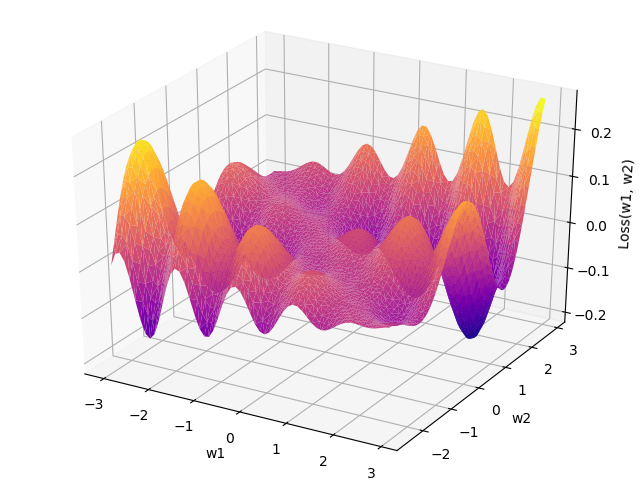

In [50]:
%matplotlib notebook
Points = part1()
fig    = plt.figure()
fig    = plot_part1(Points, fig)
plt.show()

Using gradient descent, implement code to learn a weight vector that "minimizes" the given loss function. You will randomly initialize w N times and run gradient descent. You can compute the loss of a given weight vector w by calling 

``` python 
loss(w)
```

In [51]:
def gradient_descent(w, lr):
    ''' compute the gradient of w '''
    w.grad = None
    ''' *** the students will need to fill this in *** '''
    error = loss(w, Torch=True)
    error.backward()
    
    w.data = w.data - 1*lr*w.grad
    
    ''' *** *** '''
    return w, error.data

In [52]:
def learn_w(lr):
    w = Variable(torch.rand((2))*4-2, requires_grad=True)

    ws     = []
    errors = []
    it = 1
    grad = 10
    ws.append(w.data.numpy())
    errors.append(loss(w, Torch=True))
    while((np.linalg.norm(grad) >= 0.00005) and (it < 50)):
        w, error = gradient_descent(w, lr)
        grad = w.grad

        ws.append(w.data.numpy())
        errors.append(error)
        
        it += 1
        
    return ws, errors

In [53]:
lr = 3
N = 10

Ws     = []
Errors = []
for _ in range(N):
    ws, errors = learn_w(lr)
    Ws.append(ws)
    Errors.append(errors)

<IPython.core.display.Javascript object>


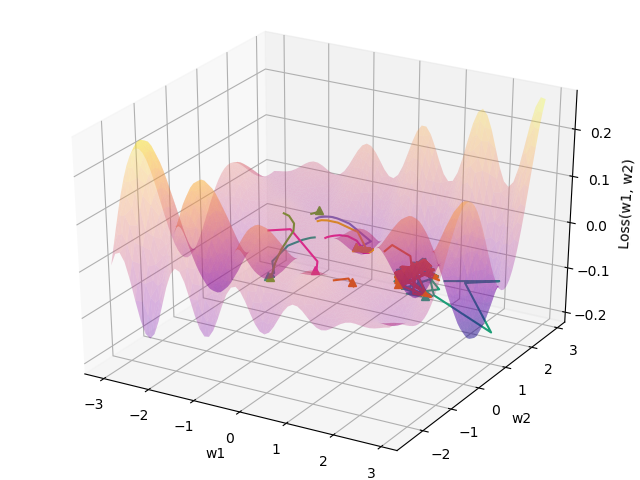

In [54]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)

cmap = cm.get_cmap('Dark2')

ax.plot_trisurf(Points[:, 0], Points[:, 1], Points[:, 2], cmap=cm.get_cmap('plasma'), alpha=0.3)


''' plot our learning trajectories '''
for i in range(N):
    c = cmap(i/(N+3))
    
    ax.plot(np.array(Ws[i])[:, 0], np.array(Ws[i])[:, 1], np.array(Errors[i]), c=c)
    ax.plot(np.array(Ws[i])[0:1, 0], np.array(Ws[i])[0:1, 1], Errors[i][0:1], c=c)
    ax.plot(np.array(Ws[i])[-2:-1, 0], np.array(Ws[i])[-2:-1, 1], Errors[i][-2:-1], marker='^', c=c )
    

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss(w1, w2)')
plt.show()

## Analytical Questions
* Do all the runs converge to the same weight values? Why or why not?
<br><br>
<i> Your answer here. </i>

* How does your weight initialization impact the solutions?
<br><br>
<i> Your answer here. </i>

* Try changing the learning rate. How does this imact the solutions? Does the learning rate impact whether the solution converges or diverges? Explain using specific learning rates you experimented with.
<br><br>
<i> Your answer here. </i>